In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_root = '/media/scottcha/Data2/OAPMLData/'

In [9]:
X_train = pd.read_parquet(data_root + '5.MLData/X_tab_train.parquet').reset_index(drop=True)
y_train = pd.read_csv(data_root + '5.MLData/y_tab_train.csv').drop(['Unnamed: 0'], axis=1)
X_test = pd.read_parquet(data_root + '5.MLData/X_tab_test.parquet').reset_index(drop=True)
y_test = pd.read_csv(data_root + '5.MLData/y_tab_test.csv').drop(['Unnamed: 0'], axis=1)

In [10]:
y_train.head()

,target
0,0.12
1,0.01
2,0.00
3,0.01
4,0.00


In [11]:
y_test.head()

,target
0,0.250
1,0.000
2,0.210
3,0.230
4,0.006


In [12]:
X_train.head()

,0__sum_values,0__median,0__mean,0__length,0__standard_deviation,0__variance,0__maximum,0__minimum,1__sum_values,1__median,...,8__maximum,8__minimum,9__sum_values,9__median,9__mean,9__length,9__standard_deviation,9__variance,9__maximum,9__minimum
0,0.00,0.0,0.000000,30.0,0.000000,0.000000,0.00,0.0,4.00,0.000,...,29.0,16.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
1,7.00,0.0,0.233333,30.0,0.803465,0.645556,4.00,0.0,42.00,0.000,...,19.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
2,1.00,0.0,0.033333,30.0,0.179505,0.032222,1.00,0.0,4.00,0.000,...,2.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
3,10.00,0.0,0.333333,30.0,0.906765,0.822222,4.00,0.0,59.00,0.000,...,17.0,1.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
4,4.37,0.0,0.145667,30.0,0.308876,0.095405,1.57,0.0,34.42,0.005,...,16.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0


In [13]:
reg = xgb.XGBRegressor(tree_method="gpu_hist")
# Fit the model using predictor X and response y.
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=24,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.48


In [16]:
pd.concat([y_test, pd.Series(y_pred)], axis=1)

,target,0
0,0.250,0.117628
1,0.000,0.104193
2,0.210,0.348418
3,0.230,0.297385
4,0.006,-0.036830
...,...,...
35782,0.110,0.134180
35783,0.170,0.384884
35784,0.520,0.251207
35785,0.004,-0.051105


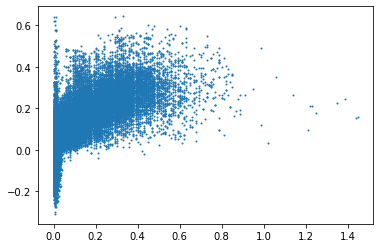

In [20]:
plt.scatter(y_test, y_pred, s=1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

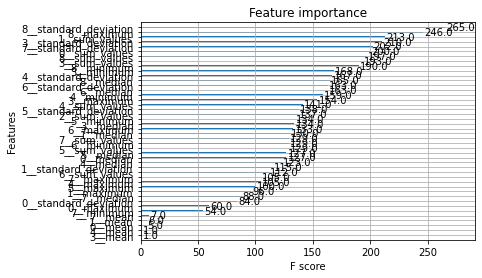

In [18]:
xgb.plot_importance(reg)